<a href="https://colab.research.google.com/github/RicardoMenna/MachineLearning_TP2/blob/main/TPN%C2%B02_Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico N°2**
*Ejercicio 2: Generación Dataset y curva ROC*

In [ ]:
"""Importaciones"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate


Creo los conjuntos con distribución normal

In [ ]:
"""Creación de dos conjuntos con distintos valores de media y desvío estandar"""
n=50
med_A = 3
ds_A = 18
med_B = 25
ds_B = 11
valores_A = np.random.normal(med_A,ds_A,n)
valores_B = np.random.normal(med_B,ds_B,n)
df_A = pd.DataFrame({"Etiqueta":"A", "Valores": valores_A})
df_B = pd.DataFrame({"Etiqueta":"B", "Valores": valores_B})


Grafico los datos de cada uno en un mismo gráfico


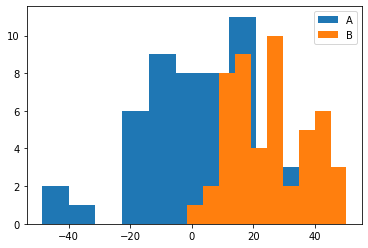

In [ ]:
"""Se grafican los histogramas de ambos dataset"""
plt.hist(df_A["Valores"])
plt.hist(df_B["Valores"])
plt.legend(["A","B"])

Concateno y ordeno los datos en forma creciente según los valores

In [ ]:
"""Concateno ambos DataFrames y ordeno en forma creciente"""
df=pd.DataFrame(np.concatenate([df_A,df_B]),columns=["Etiqueta","Valores"])
df = df.sort_values("Valores")  #Ordeno los valores en forma creciente

#Variables para las listas y el manejo de las mismas
lista_x=[]
lista_y=[]
x=0
y=0

#LLenado de listas
for i in range(len(df.Etiqueta)):
  if df.iloc[i,0]=="A":
    y=y+(1/50)
  else:
    x=x+(1/50)
  lista_x.append(x)
  lista_y.append(y)

    

Luego de generar las listas correspondientes, grafico la curva ROC

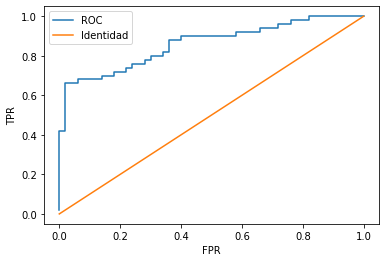

In [ ]:
"""Grafico la Curva ROC"""
plt.figure()
plt.plot(lista_x, lista_y, [0, 1.0], [0, 1.0])
plt.legend(["ROC", "Identidad"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

Luego calculo el punto que se encuentra a la mayor distancia entre la curva ROC y la identidad

In [ ]:
"""Cálculo del punto a mayor distancia"""
#Calculo la distancia de todos los puntos a la recta identidad
mayor_distancia = np.sqrt(np.abs(np.array(lista_x)-((np.array(lista_x)+np.array(lista_y))/2))+np.abs(np.array(lista_y)
-((np.array(lista_x)+np.array(lista_y))/2)))

#Hallo el lugar donde está la máxima distancia
max_valor = max(mayor_distancia)
[lugar_max_valor] = np.where(mayor_distancia == max_valor)

#Elijo umbral y creo una nueva columna en el Dataframe
valor_umbral =  df.iloc[lugar_max_valor[0],1]
df["Predicción"] = ["A" if df.iloc[i,1] < valor_umbral else "B" for i in range(len(df.Etiqueta))]
df.sample(15)


,Etiqueta,Valores,Predicción
98,B,40.5803,B
7,A,-19.4319,A
94,B,41.434,B
68,B,-1.43476,A
8,A,17.7034,B
96,B,18.4912,B
19,A,5.87417,A
41,A,-0.705842,A
1,A,2.42122,A
66,B,35.5385,B


Se observa los errores y aciertos de la predicción

In [ ]:
"""Se supone que A es negativo y B como positivo"""
df["Error Tipo"] = ["FP" if df.iloc[i,0]== "A" and df.iloc[i,2]=="B" else         #Falso positivo
                    "FN" if df.iloc[i,0]== "B" and df.iloc[i,2]=="A" else         #Falso negativo
                    "TP" if df.iloc[i,0]== "B" and df.iloc[i,2]=="B" else         #Verdadero positivo
                    "TN" for i in range(len(df.Etiqueta))]                        #Verdadero negativo
df.sample(15)

,Etiqueta,Valores,Predicción,Tipo de Error,Error Tipo
95,B,13.4655,B,VP,TP
99,B,24.591,B,VP,TP
27,A,-4.6983,A,VN,TN
3,A,26.7171,B,FP,FP
34,A,-6.04994,A,VN,TN
87,B,7.20706,B,VP,TP
31,A,4.70913,A,VN,TN
49,A,2.78651,A,VN,TN
11,A,6.77183,A,VN,TN
82,B,40.1659,B,VP,TP


Se calcula la relación que existe entre los resultados obtenidos y se muestra los resultados en una tabla

In [ ]:
fp, fn, tp, tn = [np.sum(df["Error Tipo"] == i) for i in ["FP", "FN", "TP", "TN"]]

TPR = tp/(tp+fn)
FPR = fp/(fp+tn)
PPV = tp/(tp+fp)
f = 2*TPR*PPV/(TPR+PPV)

resultados= [ ["TPR", np.round(TPR, 2), np.round(TPR*100, 2)],
            ["FPR", np.round(FPR, 2), np.round(FPR*100, 0)],
            ["PPV", np.round(PPV, 2), np.round(PPV*100, 0)],
            ["F", np.round(f, 2), np.round(f*100, 0)]]
print(tabulate(resultados, headers=["Tipo", "Probabilidad", "Porcentaje"]))


Tipo      Probabilidad    Porcentaje
------  --------------  ------------
TPR               0.98            98
FPR               0.36            36
PPV               0.73            73
F                 0.84            84


**Observaciones**

*   De manera relativamente sencilla se puede realizar un entrenamiento para tener una clasificación bastante buena.
*   Dependiendo de los valores de media y dispersión va a variar el porcentaje de aciertos. A medida que estén más juntos, se tendrá un peor resultado.

